### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Monthly Income Prediction</div></b>
### Project Overview

This project aims to predict the monthly income of employees based on various features such as age, education, job role, and more. A Linear Regression model was developed to perform the prediction, and model performance was evaluated using key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. Additionally, hyperparameter tuning was carried out using GridSearchCV with a GradientBoostingRegressor to explore potential improvements in prediction accuracy.

In [1]:
# Import major Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing predictive regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Import the dataset

df = pd.read_csv("train_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [4]:
# Checking for missing values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Checking for duplicates

df.duplicated().any().sum()

0

### Data Preprocessing

In [6]:
# Drop off some redundant features

df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'MonthlyRate', 'Attrition'], axis=1, inplace=True)


# Create a copy of the dataset for modeling
data = df.copy()


In [7]:
# Encode the categorical features to numerical ones
data = pd.get_dummies(data, drop_first=True)

data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [8]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'Jo

In [9]:
# Segment the dataset into training data and target label
target = data.pop("MonthlyIncome")

target.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1058 non-null   int64
 1   DailyRate                          1058 non-null   int64
 2   DistanceFromHome                   1058 non-null   int64
 3   Education                          1058 non-null   int64
 4   EnvironmentSatisfaction            1058 non-null   int64
 5   HourlyRate                         1058 non-null   int64
 6   JobInvolvement                     1058 non-null   int64
 7   JobLevel                           1058 non-null   int64
 8   JobSatisfaction                    1058 non-null   int64
 9   NumCompaniesWorked                 1058 non-null   int64
 10  PercentSalaryHike                  1058 non-null   int64
 11  PerformanceRating                  1058 non-null   int64
 12  RelationshipSatisfac

In [11]:
# Scale dataset features
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Instantiate scaler object
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

# Identifying key featurs from the data set
from sklearn.ensemble import RandomForestClassifier

# We will use a random classifier model to identify the importance features
model = RandomForestClassifier()
model.fit(data_scaled, target)
name_f = list(data.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

In [12]:
data_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.888889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.928571,0.216893,0.000000,0.25,0.333333,0.900000,1.000000,0.25,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1054,0.738095,0.993558,0.214286,0.75,0.666667,0.071429,0.666667,0.50,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,0.380952,0.520401,0.500000,0.50,0.333333,0.585714,0.666667,0.75,0.000000,0.777778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1056,0.238095,0.997853,0.000000,0.50,0.000000,0.885714,0.666667,0.00,0.666667,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


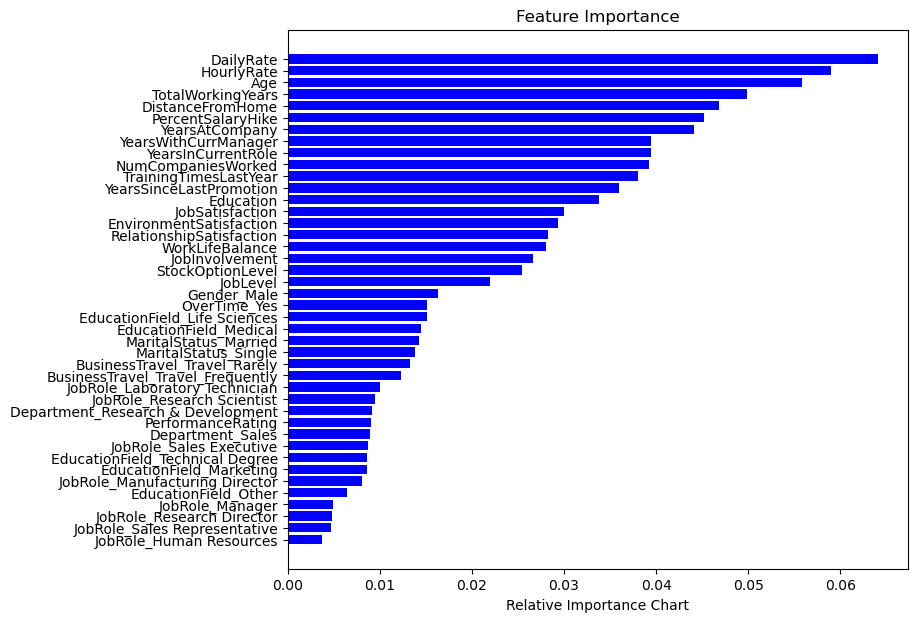

In [13]:
# Plotting a feature importance chart

plt.figure(figsize=(8, 7))
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [name_f[i] for i in indices])
plt.xlabel("Relative Importance Chart")
plt.title("Feature Importance")
plt.show()


### Model Building

In [14]:
# split the DataFrame into training and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=1)

In [15]:
print(x_train.shape)
print(x_test.shape)

(846, 42)
(212, 42)


In [16]:
# Fit a linear regression model on the training set
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [17]:
#creating a prediction file
lreg_pred = lreg.predict(x_test)


In [18]:
# Evaluate the model using the test data
mae = mean_absolute_error(y_test, lreg_pred)
mse = mean_squared_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Score {mae}") 
print(f"R-Squared Score {r2}")
print(f"Mean Squared Score {mse}")
print(f"RMSE Score {rmse}") 

Mean Absolute Score 816.1837669962842
R-Squared Score 0.9536220127061029
Mean Squared Score 1092799.0664680249
RMSE Score 1045.3703011220593


- Mean Absolute Error (MAE) Score: 816.18
  - MAE measures the average magnitude of the errors between predicted and actual values, without considering their direction. It’s the average of the absolute differences between the predicted and actual values. In this case, on average, the predictions are off by about $839.49 from the actual MonthlyIncome.

- Mean Squared Error (MSE) Score: 1,092,799.07
  - MSE is the average of the squared differences between predicted and actual values. It penalizes larger errors more than smaller ones due to the squaring. A lower MSE indicates a better fit. Here, the average of the squared errors is about 1,170,041.97, which highlights the magnitude of larger errors.

- Root Mean Squared Error (RMSE) Score: 1,045.37
  - RMSE is the square root of MSE and represents the standard deviation of the residuals (prediction errors). It provides a measure of how spread out these errors are. In this case, the typical prediction error is about $1,081.68 in MonthlyIncome.

- R-Squared (R²) Score: 0.953
  - R² measures the proportion of variance in the dependent variable (MonthlyIncome) that is predictable from the independent variables. An R² of 0.944 means that approximately 94.4% of the variance in MonthlyIncome is explained by the model. A higher R² indicates a better fit to the data.

In summary, our model shows strong performance with a high R² score, indicating that it explains a significant portion of the variance in the data. However, the RMSE and MAE values suggest that while predictions are generally close, some deviations may be substantial in absolute terms.

Let's visualize the plot of the model's predicted label  vs the actual label

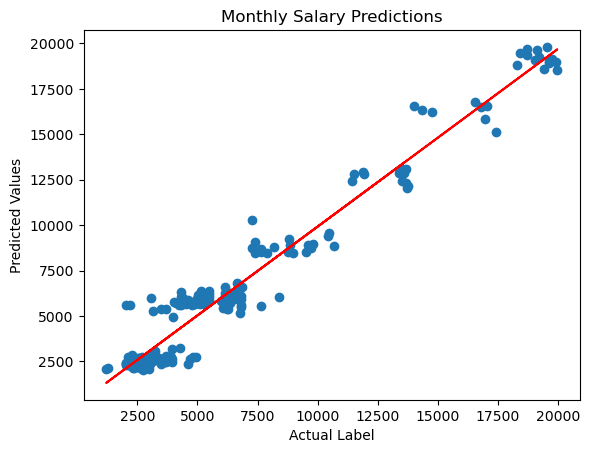

In [21]:
# Plot predicted vs actual
plt.scatter(y_test, lreg_pred)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Values")
plt.title("Monthly Salary Predictions")

# overlay the regression line
z = np.polyfit(y_test, lreg_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red");


Let's visualize the coefficients

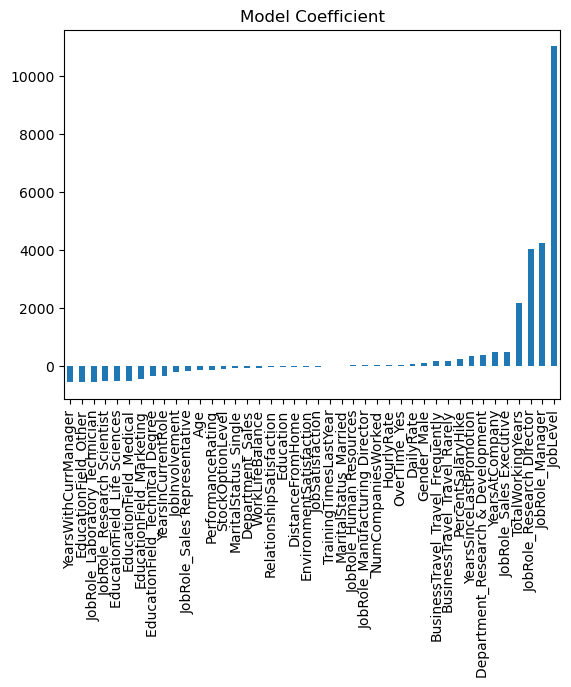

In [23]:
#visualizing model coefficients
from pandas import Series
 
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

plt.show()

The bar chart generated represents the coefficients of the linear regression model for each feature after preprocessing.

- Magnitude of Coefficients:

Features with larger positive or negative coefficients have a greater impact on the predicted MonthlyIncome. Positive coefficients (bars extending to the right) indicate that as the feature's value increases, the MonthlyIncome is expected to increase, holding all other features constant.

Negative coefficients (bars extending to the left) suggest that as the feature's value increases, the MonthlyIncome is expected to decrease, holding all other features constant.

- Key Influencing Features:

Features like cat_JobRole_Research Director, cat_JobRole_Manager, and cat_Department_Research & Development have high positive coefficients, indicating that these roles or departments are associated with higher salaries.

Conversely, roles like cat_JobRole_Laboratory Technician, cat_JobRole_Sales Representative, and cat_JobRole_Human Resources have negative coefficients, indicating these positions are associated with lower salaries compared to the baseline.

- Insights on Job Role and Department:

The job roles and departments appear to have a significant impact on the monthly income, with high-level roles such as Research Director and Manager being strongly associated with higher incomes.

- Other Features:

Numerical features (prefixed with num_) like years of experience, performance ratings, etc., also contribute to the prediction but with varying degrees of influence. These are typically scaled, so their impact may appear smaller or larger based on the scale of the original feature.

In conclusion, this plot helps identify which features are most influential in predicting MonthlyIncome. Understanding these coefficients can offer insights into how different roles, departments, and other features influence employee salaries within the dataset.

- Hyper Parameter Optimization

In [11]:
# Use a Gradient Boosting algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

alg = GradientBoostingRegressor()

# Define the hyperparameters to tune
params = {
    'model__learning_rate': [0.01, 0.1, 0.5],   # Added 0.01 for more granularity
    'model__n_estimators': [50, 100, 150],      # Number of boosting stages
    'model__max_depth': [3, 5, 7],              # Maximum depth of the individual trees
    'model__min_samples_split': [2, 5, 10]      # Minimum number of samples required to split an internal node
}


# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3)
gridsearch.fit(x_train, y_train)
print(f"best parameter combination{gridsearch.best_params_}")

# measuring performance on test set
print("applying best model on test data")
best_mod = gridsearch.best_estimator_
pred = best_mod.predict(x_test)

# Calculating performance metrics
mae1 = mean_absolute_error(y_test, pred)
mse1 = mean_squared_error(y_test, pred)
rmse1 = np.sqrt(mse)
r21 = r2_score(y_test, pred)

# Print the performance metrics
print(f"MAE Score: {mae1}") 
print(f"Mean Squared Error: {mse1}")
print(f"RMSE Score: {rmse1}") 
print(f"R-Squared Score: {r21}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameter combination: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_split': 2, 'model__n_estimators': 50}
MAE Score: 754.5761991428251
Mean Squared Error: 917512.7008506326
RMSE Score: 957.8688328005211
R-Squared Score: 0.9564590135329003


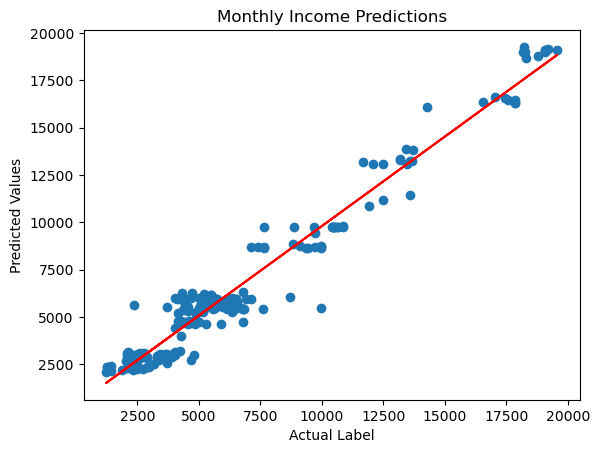

In [12]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Values")
plt.title("Monthly Income Predictions")

# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

plt.show()

We can see an improved performance through the optimized gradient boosting model, with an r-squared score of 0.96, which is better than the linear regression model.

#### Productionizing The Model

In [13]:
# Import test dataset

testing_data = pd.read_excel("test.xlsx")

testing_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


In [14]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [15]:
# Checking for missing values

testing_data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [16]:
import joblib
# Assuming gridsearch has already been fit and best_mod contains the best estimator
best_mod = gridsearch.best_estimator_

# Save the entire pipeline, including preprocessing and the trained model
joblib_file = r"C:\Users\Harrison\Downloads\best_model_pipeline.pkl"
joblib.dump(best_mod, joblib_file)

print(f"Model and preprocessing pipeline saved to {joblib_file}")


Model and preprocessing pipeline saved to C:\Users\Harrison\Downloads\best_model_pipeline.pkl


To stimulate a typical production environment, we will use the unseen testing_data.(test.xlsx) as the new employee set to predict

In [17]:
# Apply transforms to the new data similar to the training dataset

testing_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

testing_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,Female,40,...,4,3,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,4,Male,76,...,3,1,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,2,Male,89,...,3,3,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,4,Female,78,...,3,3,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,2,Male,86,...,3,2,0,16,2,2,2,2,2,2


In [18]:
# Load the saved model pipeline
joblib_file = r"C:\Users\Harrison\Downloads\best_model_pipeline.pkl"
loaded_model = joblib.load(joblib_file)

# Perform inference
predictions = loaded_model.predict(testing_data)
testing_data['predicted_monthly_income'] = predictions

# Display predictions
print("Predictions on unseen test data:")
print(predictions)


Predictions on unseen test data:
[ 6301.22385422  2313.98101104  2763.54989617  2256.55023721
  9800.12084677  5998.5090478   3004.0830104   4734.97582836
  3051.20073069  5996.03676141  2879.82456018  2453.27950179
  4673.67627171  4651.33293212  2839.64478562  5416.68416166
  5740.10972077 11119.16564246 16202.55689228  2903.07553348
 16368.03480108  8677.73141924 16553.70202648  8533.39178987
  3943.66671141  2959.21804212  8736.73558024  2893.06044004
 16440.2915955   2945.94037938  2837.64088023  5042.94755421
  5370.73336718  4782.66138815  2934.66893242  9800.12084677
  5972.61806424  4740.98220467 16596.04597726  2739.4122863
  5434.92262797  8677.73141924  3058.86350215  5325.26905176
  3046.69673548  6258.87990344  2649.56131703  5972.61806424
  5950.77275424  5392.57867718  2809.08992337  8729.33739107
  2393.87701501  9757.77689598  5483.86866903  5057.73592622
  2900.9553068   2352.14580225 18961.63981991  5144.00017572
  2304.51785875  5953.69281063  5972.61806424  6258.8

In [20]:
testing_data['predicted_monthly_income']

0      6301.223854
1      2313.981011
2      2763.549896
3      2256.550237
4      9800.120847
          ...     
407    4150.055578
408    8694.391629
409    5445.363149
410    6258.879903
411    4634.672722
Name: predicted_monthly_income, Length: 412, dtype: float64

In [21]:
testing_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,predicted_monthly_income
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,Female,40,...,3,0,16,2,4,15,9,10,10,6301.223854
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,4,Male,76,...,1,1,1,3,3,1,0,0,0,2313.981011
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,2,Male,89,...,3,0,4,2,2,0,0,0,0,2763.549896
3,24,Non-Travel,830,Sales,13,2,Life Sciences,4,Female,78,...,3,1,1,2,3,1,0,0,0,2256.550237
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,2,Male,86,...,2,0,16,2,2,2,2,2,2,9800.120847
